### KDD (CIS-635) Project, Fall 2023:

# Status of Malaria in the African continent - Data Mining Insights from Heterogeneous, but Interrelated Data Sources.

By

*   *Ken Muchira*
*   *Hemalatha Sabbineni*
*   *John Moses Bollarapu*





**Abstract:** Malaria is a life-threatening mosquito-borne infectious disease, mainly caused by the
plasmodium parasites. African continent still suffers the most from this disease for many reasons
such as poverty, lack of awareness, lack of investments, insufficient infrastructure and precaution
measures, weak policy as well as management, and improper diagnosis practices. In this research,
we have performed extensive malaria data analysis for several African countries for the period 2000-
2020, and were able to extract some key insights for actionable insights. Our analysis shows that,
overall, the continent has reduced the malaria infection rate from 37% to 25% (and associated death
rates from 0.15% to 0.05%) in the last twenty years - a big achievement indeed. Unfortunately, some
countries couldn’t follow this trend, leading the progress and the development curve to be stalled
or constant and sometimes even negative for the last few years. These rates are still higher when we
compare them to other parts of the world. We were also able to make some concrete associations
with finances, associated investments, and the malaria diagnostics methodologies, adopted and
practiced by certain countries. The overall healthcare spending (as a share of the Gross Domestic
Product (GDP)) in Africa is way below the global healthcare spending as reported (5.6% vs 8.5%)
in 2000 and (5.18% vs 9.8%) in 2019 by the World Health Organization (WHO). More alarming
is, due to healthcare cuts, in recent years many countries switched from the more orthodox and
effective microscopy diagnostics tests to comparatively cheaper and less effective Rapid Diagnostic
Tests (RDTs) leading to severe consequences. We have made some concrete recommendations to
combat malaria and to reduce infection and associated mortality rates.

## An block diagram of the data pipeline

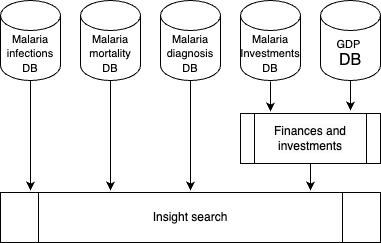


**Three major sources of data:**

- Malaria Infections (WHO)
- Malaria Related Deaths (WHO)
- Malaria Diagnosis Mehtods (WHO)
- GDA (World Bank)

## Packge Imports

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os
import numpy as np

In [2]:
base_path = "https://raw.githubusercontent.com/mdkamrulhasan/data-public/refs/heads/main/malaria-gdp-diag-africa/2023"



> Add blockquote



In [3]:
cases_vs_death_path = os.path.join(base_path, "casesVSDeaths.csv")
age_group_death_path = os.path.join(base_path, "malaria_deaths_age.csv")
cases_by_method_path = os.path.join(base_path, "Reported_malaria_cases_by_method.csv")
gdp_path = os.path.join(base_path, "GDP.csv")
gdp_healthcare_path = os.path.join(base_path, "HealthcareGDP.csv")
funds_govt_path = os.path.join(base_path, "fundsReportedGovns.csv")
geography_path = os.path.join(base_path, "geography.csv")

countries = sorted(['kenya', 'burkina faso', 'nigeria', 'uganda'])
years = [str(x) for x in np.arange(2000, 2020)]

In [4]:
cases_vs_death = pd.read_csv(cases_vs_death_path)

In [5]:
# formatting country names in lower case
cases_vs_death['Country_lw'] = cases_vs_death.Country.apply(lambda x: x.lower())

In [6]:
cases_vs_death.head(2)

,Country,Year,Population,CasesLower,CasesPoint,CasesUpper,DeathsLower,DeathsPoint,DeathsUpper,Region,Country_lw
0,Algeria,2000,1823421,0,34,0,0,2,0,Africa,algeria
1,Algeria,2001,1847461,0,6,0,0,1,0,Africa,algeria


In [7]:
# data normalzation by dividing number of infections by the total population of a country
cases_vs_death['cases_nm'] = cases_vs_death.CasesPoint / cases_vs_death.Population
cases_vs_death['deaths_nm'] = cases_vs_death.DeathsPoint / cases_vs_death.Population

In [8]:
cases_vs_death.head(2)

,Country,Year,Population,CasesLower,CasesPoint,CasesUpper,DeathsLower,DeathsPoint,DeathsUpper,Region,Country_lw,cases_nm,deaths_nm
0,Algeria,2000,1823421,0,34,0,0,2,0,Africa,algeria,0.000019,1.096839e-06
1,Algeria,2001,1847461,0,6,0,0,1,0,Africa,algeria,0.000003,5.412834e-07


In [9]:
cases_vs_death.Region.unique(), cases_vs_death.Country.nunique()

(array(['Africa'], dtype=object), 44)

# Average normalized infections (infection rate) by Country

In [10]:
avg_nm_cases_deaths = cases_vs_death.groupby('Country_lw').agg({'cases_nm': 'mean', 'deaths_nm': 'mean'}).reset_index()
avg_nm_cases = avg_nm_cases_deaths.sort_values('cases_nm', ascending=False)
fig = px.bar(x=avg_nm_cases.Country_lw, y=avg_nm_cases.cases_nm)
fig.update_layout(
    autosize=True,
    yaxis_title="Normalized malaria cases",
    title="Average normalized malaria cases"
    )
fig.show()

# Average normalized malaria related deaths (death rate) by Country

In [11]:
avg_nm_deaths = avg_nm_cases_deaths.sort_values('deaths_nm', ascending=False)
fig = px.bar(x=avg_nm_deaths.Country_lw, y=avg_nm_deaths.deaths_nm)
fig.update_layout(
    autosize=True,
    yaxis_title="Normalized malaria related deaths",
    title="Average normalized malaria related deaths"
    )
fig.show()

# Infection trend over time (sample countries)

In [12]:
figures = []
for c in countries:
  figures.append(go.Scatter(x=cases_vs_death.Year,
               y=cases_vs_death[cases_vs_death.Country_lw.isin([c])]['cases_nm'], name=c))
fig = go.Figure(figures)


fig.update_layout(
    title="Malaria infection rate trend (2000 - 2020)",
    yaxis_title="infection rate",
    legend_title="")

fig.update_layout(
    autosize=True,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.show()

# Malaria related death trend over time (sample countries)

In [13]:
figures = []
for c in countries:
  figures.append(go.Scatter(x=cases_vs_death.Year,
               y=cases_vs_death[cases_vs_death.Country_lw.isin([c])]['deaths_nm'], name=c))
fig = go.Figure(figures)


fig.update_layout(
    title="Malaria related death rate trend (2000 - 2020)",
    yaxis_title="death rate",
    legend_title="")

fig.update_layout(
    autosize=True,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.show()

# Yearly statistics (Continent of Africa)

In [14]:
# (Region, Year) deaths
deaths_region_year = cases_vs_death.groupby(['Region', 'Year']).agg({'DeathsPoint': 'sum',
                                                                     'CasesPoint': 'sum',
                                                                     'Population': 'sum'})
# data normalzation
deaths_region_year['deaths_nm'] = deaths_region_year.DeathsPoint / deaths_region_year.Population
deaths_region_year['cases_nm'] = deaths_region_year.CasesPoint / deaths_region_year.Population
deaths_region_year = deaths_region_year.reset_index()
deaths_region_year_africa = deaths_region_year[deaths_region_year.Region.isin(['Africa'])]

In [15]:
deaths_region_year.head(2)

,Region,Year,DeathsPoint,CasesPoint,Population,deaths_nm,cases_nm
0,Africa,2000,839720,206651695,561458148,0.001496,0.368063
1,Africa,2001,837574,212231714,576884826,0.001452,0.367893


In [16]:
# plotting the infection freq by year
px.bar(x=deaths_region_year_africa.Year, y=deaths_region_year_africa.CasesPoint,
       title='Malaria cases over Years (Africa)')

Comment: Number of infections is quite constant over years; infact, we see an increase in the last few years.

In [17]:
# plotting the infection freq by year (normalized)
px.bar(x=deaths_region_year_africa.Year, y=deaths_region_year_africa.cases_nm,
       title='Normalized malaria cases over Years (Africa)')

Comment: Infection rate is decreasing over time; however, it is quite constant/static in the last few years.

In [18]:
# plotting the death progressions (per population)
px.bar(x=deaths_region_year_africa.Year, y= deaths_region_year_africa.deaths_nm,
       title='Normalized malaria related deaths cases over Years')

# Deaths by Age group

In [19]:
age_group_death = pd.read_csv(age_group_death_path)
age_group_death.head(2)

,entity,code,year,age_group,deaths
0,Afghanistan,AFG,1990,Under 5,184.606435
1,Afghanistan,AFG,1991,Under 5,191.658193


In [20]:
# possibly there is an encoding error 'May-14' should be '5-14'
age_group_death.age_group.unique()

array(['Under 5', '70 or older', 'May-14', '15-49', '50-69'], dtype=object)

In [21]:
# fixing 'May-14' should be '5-14'
age_group_death['age_group'] = age_group_death.age_group.apply(lambda x: '5-14' if x=='May-14' else x)

In [22]:
age_group_death = age_group_death.rename(columns={'entity':'Country'})
age_group_death['Country_lw'] = age_group_death.Country.apply(lambda x: x.lower())
age_group_death.head(2)

,Country,code,year,age_group,deaths,Country_lw
0,Afghanistan,AFG,1990,Under 5,184.606435,afghanistan
1,Afghanistan,AFG,1991,Under 5,191.658193,afghanistan


# Lets bring region tags

In [23]:
age_group_death_africa = age_group_death.merge(cases_vs_death[['Country_lw']], on='Country_lw', how='inner')
age_group_death_africa.shape

(110565, 6)

In [24]:
age_group_death_africa.head(2)

,Country,code,year,age_group,deaths,Country_lw
0,Algeria,DZA,1990,Under 5,0.633437,algeria
1,Algeria,DZA,1990,Under 5,0.633437,algeria


In [25]:
age_group_death_africa.year.min(), age_group_death_africa.year.max()

(1990, 2016)

In [26]:
age_group_death_africa.age_group.unique()

array(['Under 5', '70 or older', '5-14', '15-49', '50-69'], dtype=object)

In [27]:
# (Region, age_group) deaths
deaths_age_group = age_group_death_africa[age_group_death_africa.year>=2000].groupby(
    ['age_group']).agg({'deaths': 'sum'}).reset_index().sort_values('deaths', ascending=False)
deaths_age_group.head(2)

,age_group,deaths
4,Under 5,1.793726e+08
1,5-14,1.809973e+07


# Normalized malaria related deaths per age group

In [28]:
# fig = px.bar(x=deaths_age_group.age_group, y=deaths_age_group.deaths/deaths_age_group.deaths.sum())
fig = px.pie(deaths_age_group, values=deaths_age_group.deaths/deaths_age_group.deaths.sum(), names='age_group')
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    xaxis_title="Age group",
    yaxis_title="normalized malaria related deaths",
    title="Normalized malaria related deaths per age group"
    )
fig.show()

# Normalized malaria related deaths per age group (sample countries)

In [29]:
# (Country, age_group) deaths
deaths_age_group_country = age_group_death_africa[age_group_death_africa.year>=2000].groupby(
    ['age_group', 'Country_lw']).agg({'deaths': 'sum'}).reset_index().sort_values('deaths', ascending=False)
deaths_age_group_country.head(2)

,age_group,Country_lw,deaths
184,Under 5,nigeria,8.013723e+07
192,Under 5,uganda,1.330729e+07


In [30]:
figures = []
for c in countries[:1]:
  dag_country = deaths_age_group_country[deaths_age_group_country.Country_lw.isin([c])]
  fig = go.Pie(labels=dag_country.age_group, values=dag_country.deaths/dag_country.deaths.sum(), pull=[0.03, 0, 0, 0, 0])
  figures.append(fig)
  fig = go.Figure(fig)

  fig.update_layout(
    title="% of malaria related deaths per age group:{}".format(c),
    autosize=False,
    width=800,
    height=500,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
  )
  fig.show()

In [31]:
figures = []
for c in countries[1:2]:
  dag_country = deaths_age_group_country[deaths_age_group_country.Country_lw.isin([c])]
  # fig = px.pie(dag_country, values=dag_country.deaths/dag_country.deaths.sum(), names='age_group')
  fig = go.Pie(labels=dag_country.age_group, values=dag_country.deaths/dag_country.deaths.sum(), pull=[0.03, 0, 0, 0, 0])
  figures.append(fig)
  fig = go.Figure(fig)

  fig.update_layout(
    title="% of malaria related deaths per age group:{}".format(c),
    autosize=False,
    width=800,
    height=500,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
  )
  fig.show()

In [32]:
figures = []
for c in countries[2:3]:
  dag_country = deaths_age_group_country[deaths_age_group_country.Country_lw.isin([c])]
  # fig = px.pie(dag_country, values=dag_country.deaths/dag_country.deaths.sum(), names='age_group')
  fig = go.Pie(labels=dag_country.age_group, values=dag_country.deaths/dag_country.deaths.sum(), pull=[0.03, 0, 0, 0, 0])
  figures.append(fig)
  fig = go.Figure(fig)

  fig.update_layout(
    title="% of malaria related deaths per age group:{}".format(c),
    autosize=False,
    width=800,
    height=500,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
  )
  fig.show()

In [33]:
figures = []
for c in countries[3:4]:
  dag_country = deaths_age_group_country[deaths_age_group_country.Country_lw.isin([c])]
  # fig = px.pie(dag_country, values=dag_country.deaths/dag_country.deaths.sum(), names='age_group')
  fig = go.Pie(labels=dag_country.age_group, values=dag_country.deaths/dag_country.deaths.sum(), pull=[0.03, 0, 0, 0, 0])
  figures.append(fig)
  fig = go.Figure(fig)

  fig.update_layout(
    title="% of malaria related deaths per age group:{}".format(c),
    autosize=False,
    width=800,
    height=500,
    legend=dict(
        x=0.85,
        y=0.99,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
  )
  fig.show()

# GDP distibution

In [34]:
gdp_df = pd.read_csv(gdp_path)
gdp_df['Country_lw'] = gdp_df.Country.apply(lambda x: x.lower())
gdp_df.head(2)

,Country,Code,Indicator,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Country_lw
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.276188e+09,3.395794e+09,2.610039e+09,3.126019e+09,NaN,aruba
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.112502e+10,2.161623e+10,2.350628e+10,2.804836e+10,2.592067e+10,2.947210e+10,...,1.006530e+12,9.273480e+11,8.851760e+11,1.021040e+12,1.007200e+12,1.000830e+12,9.275930e+11,1.082000e+12,1.169480e+12,africa eastern and southern


# Avg GDP (last 10 years)

In [35]:
# we are using last 10 years (but not all values are available for all coutnries)
# not only Africa
gdp_df['avg_gdp_last10Yr'] = gdp_df.apply(lambda x: np.mean(x[-10:-1]), axis=1)
gdp_df = gdp_df.sort_values('avg_gdp_last10Yr', ascending=False)

In [36]:
px.bar(x=gdp_df.Country, y=gdp_df.avg_gdp_last10Yr)

In [37]:
gdp_df.head(2)

,Country,Code,Indicator,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,Country_lw,avg_gdp_last10Yr
259,World,WLD,GDP (current US$),NY.GDP.MKTP.CD,1.384860e+12,1.449220e+12,1.550820e+12,1.671450e+12,1.830490e+12,1.994100e+12,...,7.521510e+13,7.648650e+13,8.144200e+13,8.650220e+13,8.772810e+13,8.521520e+13,9.688240e+13,1.005620e+14,world,8.553222e+13
95,High income,HIC,GDP (current US$),NY.GDP.MKTP.CD,1.070310e+12,1.133270e+12,1.222980e+12,1.316950e+12,1.437550e+12,1.561240e+12,...,4.827360e+13,4.930630e+13,5.157090e+13,5.483970e+13,5.531550e+13,5.393800e+13,6.001670e+13,6.153580e+13,high income,5.399229e+13


# Avg GDP (last 10 years) for those countries for which we have Malaria data

In [38]:
gdp_summary_africa = gdp_df[gdp_df.Country_lw.isin(cases_vs_death.Country_lw.values)]
px.bar(x=gdp_summary_africa.Country, y=gdp_summary_africa.avg_gdp_last10Yr)

# GDP Expenses over healtcare

In [39]:
# Gdp healtcare %
gdp_healtcare = pd.read_csv(gdp_healthcare_path)
gdp_healtcare.head(2)

,Country,Code,Indicator,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.202949,5.839963,6.150307,6.064641,5.96565,5.819182,5.804298,5.855497,NaN,NaN


In [40]:
gdp_healtcare['Country_lw'] = gdp_healtcare.Country.apply(lambda x: x.lower())
gdp_healtcare['avg_gdp_last10Yr_hc'] = gdp_healtcare.apply(lambda x: np.mean(x[-10:-1]), axis=1)
gdp_healtcare = gdp_healtcare.sort_values('avg_gdp_last10Yr_hc', ascending=False)
px.bar(x=gdp_healtcare.Country, y=gdp_healtcare.avg_gdp_last10Yr_hc)

# GDP expenses over healthcare (African countries)

In [41]:
# Africa only
gdp_healthcare_summary_africa = gdp_healtcare[gdp_healtcare.Country_lw.isin(cases_vs_death.Country_lw.values)]
px.bar(x=gdp_healthcare_summary_africa.Country, y=gdp_healthcare_summary_africa.avg_gdp_last10Yr_hc)

In [42]:
gdp_healthcare_summary_africa.head(2)

,Country,Code,Indicator,IndicatorCode,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,Country_lw,avg_gdp_last10Yr_hc
210,Sierra Leone,SLE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.413412,16.525959,9.399761,8.289875,8.846684,8.756371,NaN,NaN,sierra leone,13.137068
131,Liberia,LBR,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10.616328,9.858108,9.953795,9.848765,8.431415,9.499413,NaN,NaN,liberia,9.630237


# GDP expenses over healthcare (Africa, over years)

In [43]:
avg_gdp_health_care = gdp_healthcare_summary_africa[years].mean()
# mean/agv % gdp over healthcare for [2000 - 2020]
px.bar(x=years, y=gdp_healthcare_summary_africa[years].mean())

# Country comparison (Africa)

In [44]:
countries = sorted(['nigeria', 'kenya', 'uganda', 'burkina faso', 'congo, dem. rep.'])
figures = []
for c in countries:
  figures.append(go.Scatter(x=years,
               y=gdp_healtcare[gdp_healtcare.Country_lw.isin([c])][years].values[0], name=c))
fig = go.Figure(figures)


fig.update_layout(
    title="% of National GDP spent on Healthcare",
    yaxis_title="% of GDP over Healtcare",
    legend_title="Year")

fig.update_layout(
    legend=dict(
        x=0.05,
        y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.show()

# GDP Growth over yeras

In [45]:
figures = []
for c in countries:
  figures.append(go.Scatter(x=years,
               y=gdp_df[gdp_df.Country_lw.isin([c])][years].values[0], name=c))
fig = go.Figure(figures)


fig.update_layout(
    title="GDP Growth over Years",
    yaxis_title="GDP (US$)",
    legend_title="Year")

fig.update_layout(
    legend=dict(
        x=0.05,
        y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.show()

# Diagnosis methods, practiced in the region

In [46]:
cases_by_method = pd.read_csv(cases_by_method_path, encoding='unicode_escape')
cases_by_method.head(2)

,Country,method,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Region
0,Algeria,Suspectedcases,12224,11974,15790,12762,8690,8000,6628,6469,10081,8620,11197,Africa
1,Algeria,Presumedandconfirmed,408,191,887,603,266,747,432,453,1242,1014,2726,Africa


In [47]:
year_ids = ['Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014',
       'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020']
agg_config = {x: 'sum' for x in year_ids}

In [48]:
def process_dataframe(df):
  # renaming columns after the Transpose operation
  df = df.T
  columns_to_rename = {}
  for colx in df.columns:
    columns_to_rename[colx] = df.loc['method'][colx]
  df = df.rename(columns=columns_to_rename)
  df = df.drop('method')


  # estimating proportions
  for colx in df.columns:
    df[colx+'_prop'] = df.apply(lambda x: x[colx]/np.sum(x), axis=1)

  return df

In [49]:
def draw_horizontal_bar_charts(df, region):

  plot = go.Figure(data=[go.Bar(
    name = 'Microscopyexamined',
    y = df.index,
    x = df.Microscopyexamined_prop,
    orientation='h',
   ),
    go.Bar(
    name = 'RDTexamined',
    y = df.index,
    x = df.RDTexamined_prop,
    orientation='h',
   )
  ])

  plot.update_layout(
    barmode='stack',
    autosize=False,
    width=1000,
    height=500,
    title="Diagnosis method (prop):{}".format(region[0].upper() + region[1:]),
    yaxis_title="Year",
    legend_title="Diagnosis method")

  plot.show()

In [50]:
def diagnosis_per_country(df, query_country):

  df = df[(df.method.isin(['Microscopyexamined', 'RDTexamined']))
                &
                (df.Country_lw.isin([query_country]))]
  df = df.drop(columns = ['Region', 'Country', 'Country_lw'])

  df = process_dataframe(df)
  draw_horizontal_bar_charts(df, query_country)

In [51]:
cases_by_method['Country_lw'] = cases_by_method.apply(lambda x:x.Country.lower(), axis=1)

In [52]:
cases_by_method.head(2)

,Country,method,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Region,Country_lw
0,Algeria,Suspectedcases,12224,11974,15790,12762,8690,8000,6628,6469,10081,8620,11197,Africa,algeria
1,Algeria,Presumedandconfirmed,408,191,887,603,266,747,432,453,1242,1014,2726,Africa,algeria


Diagnosis method distribution (sample countries)

In [53]:
for cc in ['kenya', 'burkina faso', 'nigeria', 'uganda']:
  diagnosis_per_country(cases_by_method, cc)

In [54]:
# diagnosis per region
cases_by_method_agg = cases_by_method.groupby(['Region', 'method']).agg(agg_config).reset_index()
cases_by_method_agg = cases_by_method_agg[cases_by_method_agg.method.isin(['Microscopyexamined', 'RDTexamined'])].drop(columns=['Region'])#.reset_index()
#cases_by_method_agg.T.head(2)

df = process_dataframe(cases_by_method_agg)
draw_horizontal_bar_charts(df, "Africa")